In [1]:
from ximea import xiapi 
import numpy as np
%matplotlib notebook
from matplotlib import pyplot  as plt
import scipy.optimize as opt

In [8]:
#create instance for first connected camera 
cam = xiapi.Camera()

#start communication
print('Opening first camera...')
cam.open_device()

#settings
cam.set_imgdataformat('XI_MONO8')
cam.set_exposure(480)

#create instance of Image to store image data and metadata
img = xiapi.Image()

#start data acquisition
print('Starting data acquisition...')
cam.start_acquisition()

#get data and pass them from camera to img
cam.get_image(img)

#create numpy array with data from camera. Dimensions of array are determined
#by imgdataformat
data = img.get_image_data_numpy()

#stop data acquisition
print('Stopping acquisition...')
cam.stop_acquisition()

#stop communication
cam.close_device()

Opening first camera...
Starting data acquisition...
Stopping acquisition...


<IPython.core.display.Javascript object>


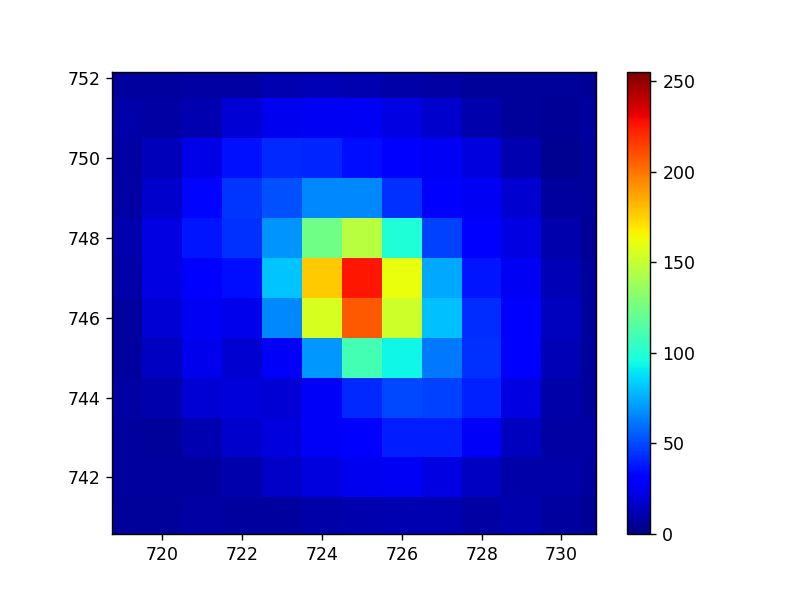

In [9]:
plt.figure()
plt.imshow(data, cmap=plt.cm.jet,origin='bottom')
plt.colorbar()

In [10]:
def TwoDGaussian((x, y), A, xo, yo, sigma_x, sigma_y):
    g = A*np.exp( - ((x-xo)**2/(2*sigma_x**2) + ((y-yo)**2)/(2*sigma_y**2)))
    return g.ravel()

x = np.linspace(0,1280,1280)
y = np.linspace(0,1024,1024)
x, y = np.meshgrid(x, y)

In [11]:
#Fit the img data to the 2D gaussian to compute the FWHM

initial_guess = (255,725,746,5,5)

popt, pcov = opt.curve_fit(TwoDGaussian, (x,y), data.ravel(), p0 = initial_guess)

In [12]:
FWHMx = 2*np.sqrt(2*np.log(2))*popt[3]
FWHMy = 2*np.sqrt(2*np.log(2))*popt[4] 

print 'FWHM x = %3.2f, FWHM y  = %3.2f' %(FWHMx,FWHMy)

FWHM x = 4.23, FWHM y  = 4.36


<IPython.core.display.Javascript object>


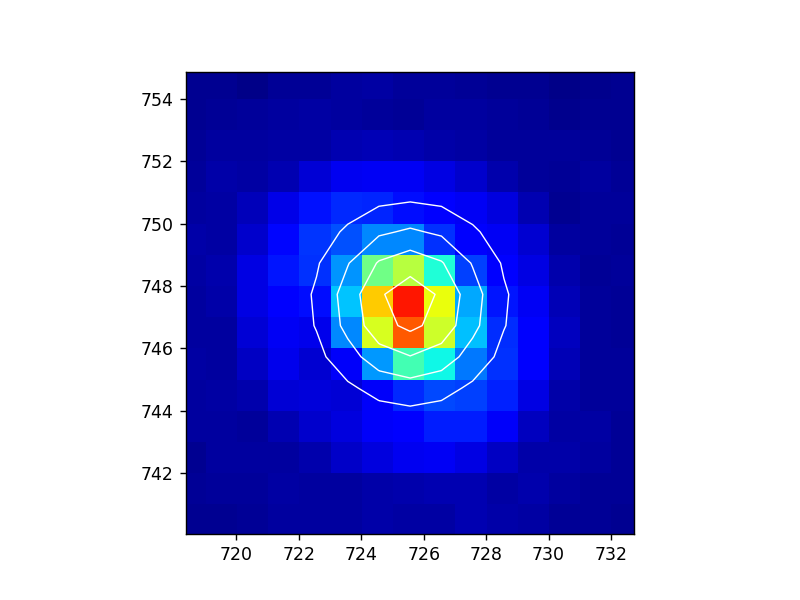

In [13]:
data_fitted = TwoDGaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.imshow(data, cmap=plt.cm.jet,origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(1024, 1280), 5, colors='w',linewidths=0.8)
plt.xlim( (popt[1]-4*popt[3], popt[1]+4*popt[3]) )
plt.ylim( (popt[2]-4*popt[4], popt[2]+4*popt[4]) )
plt.show()